In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

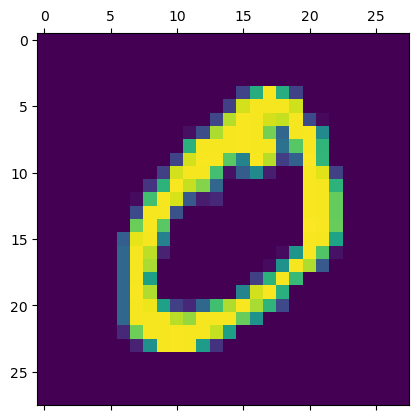

In [8]:
plt.matshow(x_train[1])

In [9]:
y_train[1]

np.uint8(0)

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
x_train_flat = x_train.reshape(len(x_train),28*28)
x_train_flat.shape

(60000, 784)

In [13]:
x_test_flat = x_test.reshape(len(x_test),28*28)

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,),activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flat, y_train, epochs = 5)

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8766 - loss: 0.4699
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9156 - loss: 0.3033
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9206 - loss: 0.2835
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9233 - loss: 0.2730
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9255 - loss: 0.2669


In [15]:
model.evaluate(x_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9244 - loss: 0.2689    


[0.2688698470592499, 0.9243999719619751]

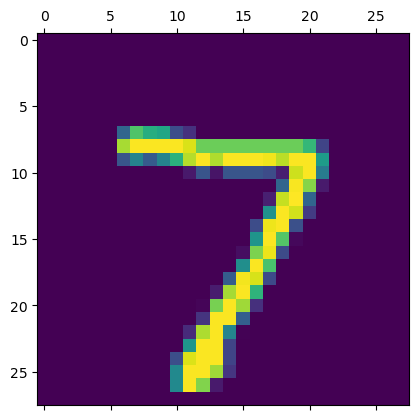

In [16]:
plt.matshow(x_test[0])

In [17]:
y_predict = model.predict(x_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [18]:
y_predict[0]

array([2.85350811e-02, 3.22638698e-07, 4.49661389e-02, 9.58808422e-01,
       1.33489934e-03, 1.03638835e-01, 3.43415036e-06, 9.99800026e-01,
       7.84989148e-02, 6.26895368e-01], dtype=float32)

In [19]:
np.argmax(y_predict[0])

np.int64(7)

In [20]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [21]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict_labels)

In [22]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    0,    2,    0,    4,   12,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   7,    8,  924,   17,    6,    3,   14,   11,   37,    5],
       [   3,    0,   18,  924,    0,   22,    4,   10,   20,    9],
       [   1,    1,    2,    2,  888,    0,   19,    4,    8,   57],
       [  10,    2,    3,   30,    7,  776,   21,    7,   28,    8],
       [   8,    3,    4,    1,    7,    8,  924,    2,    1,    0],
       [   1,    5,   22,    8,    5,    1,    0,  948,    2,   36],
       [  10,    7,    8,   24,    8,   26,   11,   13,  856,   11],
       [  11,    7,    1,   10,   14,    7,    0,   20,    5,  934]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

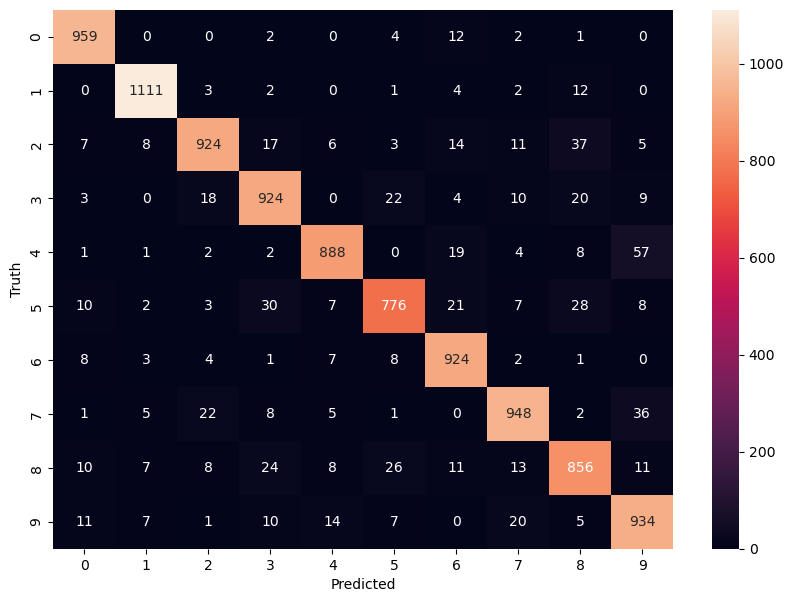

In [23]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
model_1 = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model_1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model_1.fit(x_train_flat, y_train, epochs = 5)

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9231 - loss: 0.2703
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9645 - loss: 0.1200
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9752 - loss: 0.0833
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9804 - loss: 0.0632
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9851 - loss: 0.0502


In [25]:
model_1.evaluate(x_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9732 - loss: 0.0864   


[0.08639265596866608, 0.9732000231742859]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


Text(95.72222222222221, 0.5, 'Truth')

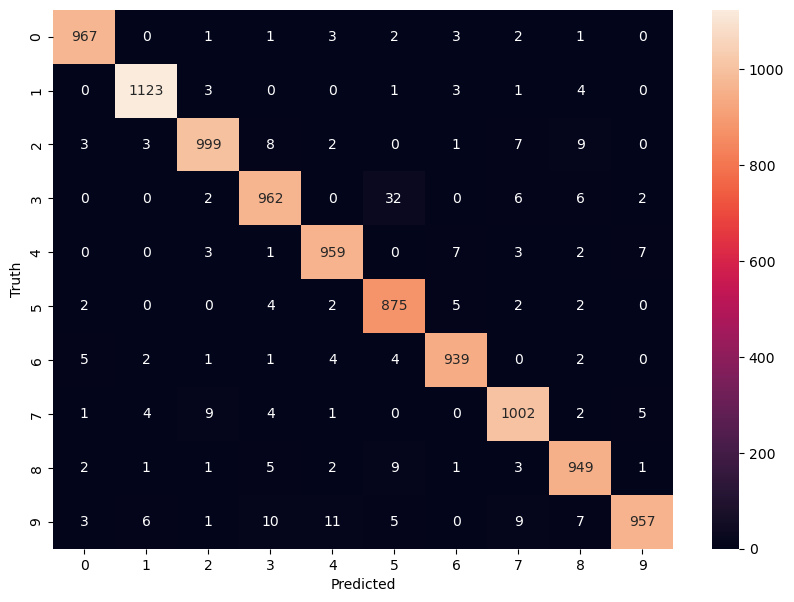

In [26]:
y_predict = model_1.predict(x_test_flat)
y_predict_labels = [np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir = 'logs/', histogram_freq = 1)

model_2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model_2.fit(x_train, y_train, epochs = 8, callbacks=[tb_callback])

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9216 - loss: 0.2789
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9642 - loss: 0.1259
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9736 - loss: 0.0884
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9797 - loss: 0.0672
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9841 - loss: 0.0520
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9872 - loss: 0.0419
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9893 - loss: 0.0340
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9910 - loss: 0.0281


In [36]:
%reload_ext tensorboard
%tensorboard --logdir logs/train

Reusing TensorBoard on port 6007 (pid 8940), started 0:05:21 ago. (Use '!kill 8940' to kill it.)